In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Подключаем библиотеки и извлекаем таблицу из файла "DetailedStatement.htm". Формируем датафрейм.

In [2]:
df = pd.read_html("DetailedStatement.htm", header=2, encoding='windows-1251')[0]
df.rename(columns = {'Price':'Open Price', 'Price.1':'Close Price', 'Item':'Symbol'}, inplace = True)
df.drop(columns=['Commission', 'Taxes', 'Swap', 'S / L', 'T / P', 'Open Price', 'Close Price'], inplace = True)
df.head()

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit
0,1494487355,2013.12.31 12:00:00,balance,Summary balance result 2013,Summary balance result 2013,Summary balance result 2013,365.47
1,613266966,2013.12.31 23:59:58,buy,0.01,profit,2013.12.31 23:59:59,-148.03
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,613266967,2014.03.31 23:59:58,buy,0.01,profit,2014.03.31 23:59:59,-125.33
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Формируем датафрейм без лишних строк. Обнуляем индесирование.

In [3]:
df2 = df[~df['Ticket'].isna()]
df2 = df2[~df2['Profit'].isna()]
df2 = df2[~df2['Close Time'].isna()]
df2 = df2[~df2['Open Time'].isna()]

df2 = df2[df2['Ticket'].str.isnumeric()]

df2 = df2[~df2['Size'].str.contains('Summary')]
df2 = df2[~df2['Size'].str.contains('Intr')]
df2 = df2[~df2['Size'].str.contains('AB')]
df2 = df2[~df2['Size'].str.contains('Dividend')]
df2 = df2[~df2['Size'].str.contains('Trading')]
df2 = df2[~df2['Profit'].str.contains('Summary')]
df2 = df2[~df2['Profit'].str.contains('cancelled')]

df2.reset_index(drop=True, inplace=True)

df2.head(15)

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit
0,613266966,2013.12.31 23:59:58,buy,0.01,profit,2013.12.31 23:59:59,-148.03
1,613266967,2014.03.31 23:59:58,buy,0.01,profit,2014.03.31 23:59:59,-125.33
2,613266968,2014.06.30 23:59:58,buy,0.01,profit,2014.06.30 23:59:59,-6.51
3,1420373603,2014.09.30 23:59:58,buy,0.01,profit,2014.09.30 23:59:59,-23.62
4,1420373604,2014.12.31 23:59:58,buy,0.01,profit,2014.12.31 23:59:59,-7.01
5,1502924029,2021.08.31 12:00:00,buy,0.01,profit,2021.08.31 12:00:00,-63.37
6,1502924034,2021.09.30 12:00:00,buy,0.01,profit,2021.09.30 12:00:00,-17.82
7,1505037663,2021.10.31 12:00:00,buy,0.01,profit,2021.10.31 12:00:00,-65.94
8,1505037665,2021.11.30 12:00:00,buy,0.01,profit,2021.11.30 12:00:00,-30.07
9,1505037669,2021.12.31 12:00:00,buy,0.01,profit,2021.12.31 12:00:00,-26.20


### 3. Форматируем строки с операциями баланса (Пополнение и снятие средств).

In [4]:
for i, row in df2.iterrows():
    if df2.iloc[i][3][:7] == 'Deposit':
        df2.iloc[i][2] = 'Deposit'
        for j in range(3, 6):
            df2.iloc[i][j] = 0
    elif df2.iloc[i][3][:10] == 'Withdrawal':
        df2.iloc[i][2] = 'Withdrawal'
        for j in range(3, 6):
            df2.iloc[i][j] = 0
            
df2.head(15)

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit
0,613266966,2013.12.31 23:59:58,buy,0.01,profit,2013.12.31 23:59:59,-148.03
1,613266967,2014.03.31 23:59:58,buy,0.01,profit,2014.03.31 23:59:59,-125.33
2,613266968,2014.06.30 23:59:58,buy,0.01,profit,2014.06.30 23:59:59,-6.51
3,1420373603,2014.09.30 23:59:58,buy,0.01,profit,2014.09.30 23:59:59,-23.62
4,1420373604,2014.12.31 23:59:58,buy,0.01,profit,2014.12.31 23:59:59,-7.01
5,1502924029,2021.08.31 12:00:00,buy,0.01,profit,2021.08.31 12:00:00,-63.37
6,1502924034,2021.09.30 12:00:00,buy,0.01,profit,2021.09.30 12:00:00,-17.82
7,1505037663,2021.10.31 12:00:00,buy,0.01,profit,2021.10.31 12:00:00,-65.94
8,1505037665,2021.11.30 12:00:00,buy,0.01,profit,2021.11.30 12:00:00,-30.07
9,1505037669,2021.12.31 12:00:00,buy,0.01,profit,2021.12.31 12:00:00,-26.20


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ticket      2159 non-null   object
 1   Open Time   2159 non-null   object
 2   Type        2159 non-null   object
 3   Size        2159 non-null   object
 4   Symbol      2159 non-null   object
 5   Close Time  2159 non-null   object
 6   Profit      2159 non-null   object
dtypes: object(7)
memory usage: 118.2+ KB


### 4. Изменяем типы данных для столбцов

In [6]:
df2['Ticket'] = df2['Ticket'].astype('int64')
df2[['Open Time','Close Time']] = df2[['Open Time','Close Time']].astype('datetime64[ns]')
df2[['Size','Profit']] = df2[['Size','Profit']].astype('float64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticket      2159 non-null   int64         
 1   Open Time   2159 non-null   datetime64[ns]
 2   Type        2159 non-null   object        
 3   Size        2159 non-null   float64       
 4   Symbol      2159 non-null   object        
 5   Close Time  2159 non-null   datetime64[ns]
 6   Profit      2159 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 118.2+ KB


### Отсекаем участок истории с обобщенными данными и оставляем детализированный.

In [7]:
df_period = df2[(df2['Open Time'].dt.year >= 2023) & (df2['Open Time'].dt.month >= 4)]\
            .sort_values('Open Time').reset_index(drop=True)

df_period.head()

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit
0,1522088214,2023-04-03 03:47:20,buy,0.01,xauusd,2023-04-03 05:56:52,-8.88
1,1522182423,2023-04-03 06:01:17,buy,0.01,eurjpy,2023-04-04 14:58:06,8.39
2,1522092305,2023-04-03 06:01:17,buy,0.01,eurjpy,2023-04-04 11:29:36,8.86
3,1522092310,2023-04-03 06:01:31,buy,0.01,gbpjpy,2023-04-04 11:29:22,13.79
4,1522182415,2023-04-03 06:01:31,buy,0.01,gbpjpy,2023-04-04 14:58:10,17.36


### Отфильтруем операции пополнения и снятия средств.

In [8]:
df_period_op = df_period[(df_period['Type'] == 'Withdrawal') | (df_period['Type'] == 'Deposit')]
df_period_op.head()

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit
95,1522308605,2023-04-06 13:07:06,Withdrawal,0.0,0,1970-01-01,-150.00
613,1523183340,2023-04-25 04:52:10,Deposit,0.0,0,1970-01-01,70.58
647,1523211012,2023-04-25 13:52:13,Deposit,0.0,0,1970-01-01,46.00
742,1523500546,2023-04-30 04:55:32,Deposit,0.0,0,1970-01-01,39.69
770,1523642734,2023-05-02 18:55:08,Deposit,0.0,0,1970-01-01,118.98


### Отфильтруем отдельно торговые операции. Подсчитаем сумарный торговый результат.

In [9]:
df_period_pos = df_period[~(df_period['Type'] == 'Withdrawal') & ~(df_period['Type'] == 'Deposit')]
df_period_pos = df_period_pos[~(df_period_pos['Profit'] == 0.0)].reset_index(drop=True)
df_period_pos['Total_Profit'] = df_period_pos.agg({'Profit': 'cumsum'})
df_period_pos.tail(1)

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit,Total_Profit
2058,1528692824,2023-07-28 17:36:48,buy,0.02,usdjpy,2023-07-28 17:40:01,-1.67,-436.89


### Добавим столбец интервала между сделками.

In [10]:
pd.options.mode.chained_assignment = None

df_period_pos['Interval'] = df_period_pos['Open Time'].diff()
df_period_pos['Interval'][0] = '0'
df_period_pos['Interval'] = df_period_pos['Interval'].dt.total_seconds().div(60).astype(int)

df_period_pos.head()

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit,Total_Profit,Interval
0,1522088214,2023-04-03 03:47:20,buy,0.01,xauusd,2023-04-03 05:56:52,-8.88,-8.88,0
1,1522182423,2023-04-03 06:01:17,buy,0.01,eurjpy,2023-04-04 14:58:06,8.39,-0.49,133
2,1522092305,2023-04-03 06:01:17,buy,0.01,eurjpy,2023-04-04 11:29:36,8.86,8.37,0
3,1522092310,2023-04-03 06:01:31,buy,0.01,gbpjpy,2023-04-04 11:29:22,13.79,22.16,0
4,1522182415,2023-04-03 06:01:31,buy,0.01,gbpjpy,2023-04-04 14:58:10,17.36,39.52,0


### Подсчитаем суммарный торговый результат с учетом балансовых операций за выбранный период.

In [11]:
df_period['Total_Profit'] = df_period.agg({'Profit': 'cumsum'})
df_period.tail(1)

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit,Total_Profit
2072,1528692824,2023-07-28 17:36:48,buy,0.02,usdjpy,2023-07-28 17:40:01,-1.67,-126.27


In [12]:
def DrawChart(x, y, title="", xlab='', ylab=''):
    plt.figure(figsize=(16,4))
    plt.title(title, fontsize=20, color='red')
    plt.xlabel(xlab, fontsize=18)
    plt.ylabel(ylab, fontsize=18)
    plt.plot(x, y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.axhline(y=0, color='black', linestyle='dotted')
    plt.show()

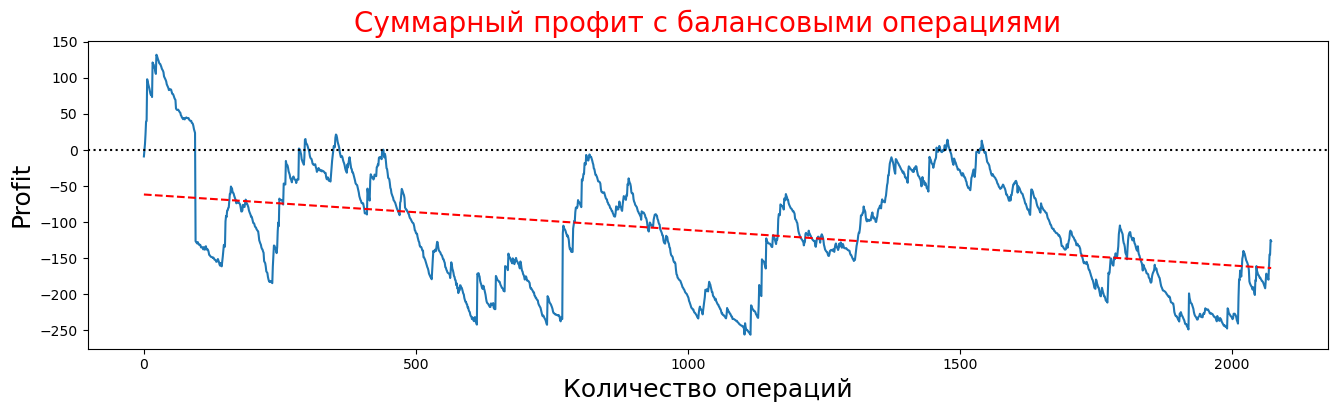

In [13]:
x = df_period['Total_Profit'].index
y = df_period['Total_Profit']
DrawChart(x, y, 'Суммарный профит с балансовыми операциями', 'Количество операций', 'Profit')

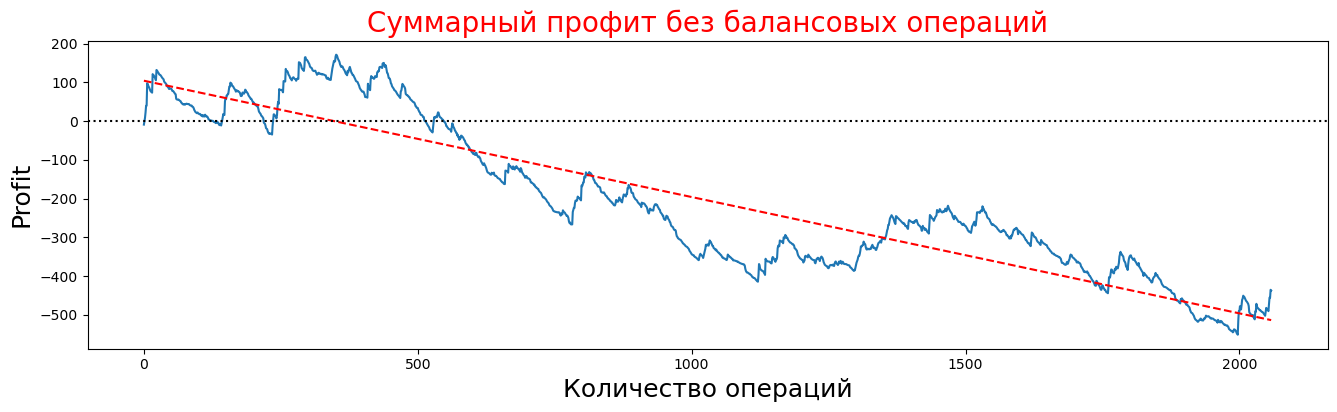

In [14]:
x = df_period_pos['Total_Profit'].index
y = df_period_pos['Total_Profit']
DrawChart(x, y, 'Суммарный профит без балансовых операций', 'Количество операций', 'Profit')

### По графику мы видим, что кривая доходности уверенно идет вниз. Торговля убыточная.

In [15]:
df_ord = df_period_pos[['Symbol', 'Size', 'Open Time', 'Interval', 'Profit']]
df_ord['Profit_Orders'] = df_ord['Profit'].apply(lambda x: 0 if x<0 else 1)
df_ord['Loss_Orders'] = df_ord['Profit'].apply(lambda x: 0 if x>0 else 1)
df_ord.insert(loc = 3, column = 'Hour', value = df_ord['Open Time'].dt.hour)
df_ord.head()

,Symbol,Size,Open Time,Hour,Interval,Profit,Profit_Orders,Loss_Orders
0,xauusd,0.01,2023-04-03 03:47:20,3,0,-8.88,0,1
1,eurjpy,0.01,2023-04-03 06:01:17,6,133,8.39,1,0
2,eurjpy,0.01,2023-04-03 06:01:17,6,0,8.86,1,0
3,gbpjpy,0.01,2023-04-03 06:01:31,6,0,13.79,1,0
4,gbpjpy,0.01,2023-04-03 06:01:31,6,0,17.36,1,0


In [16]:
profit_pos = df_ord[df_ord['Profit'] > 0]['Profit'].agg(['max', 'min', 'mean', 'count'])
profit_pos

max       57.940000
min        0.010000
mean       6.238761
count    468.000000
Name: Profit, dtype: float64

In [17]:
loss_pos = df_ord[df_ord['Profit'] < 0]['Profit'].agg(['max', 'min', 'mean', 'count'])
loss_pos

max        -0.010000
min       -15.780000
mean       -2.109761
count    1591.000000
Name: Profit, dtype: float64

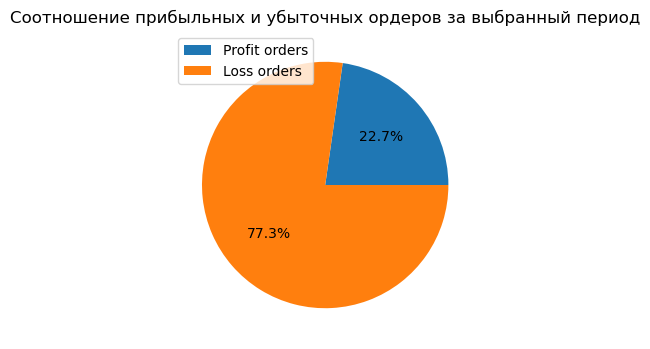

In [18]:
# Строим круговую диаграмму
plt.figure(figsize=(6, 4))

data = [profit_pos[3], loss_pos[3]]
plt.pie(data, autopct='%1.1f%%')

plt.title('Соотношение прибыльных и убыточных ордеров за выбранный период')
plt.legend(['Profit orders',  'Loss orders']);

### Из приведенных расчетов мы видим:
- ### средняя прибыльная сделка превышает среднюю убыточную практически в 3 раза
- ### самая прибыльная сделка превышает самую убыточную больше чем в 3 раза.

### Создадим датафрейм с группировкой по датам

In [19]:
df_date = df_ord.groupby([pd.Grouper(key='Open Time', freq='D')]).agg(Daily_Profit=('Profit', 'sum'), 
                                                                      Orders=('Open Time', 'count'), 
                                                                      Profit_Orders=('Profit_Orders', 'sum'), 
                                                                      Loss_Orders=('Loss_Orders', 'sum')).reset_index()

df_date = df_date[df_date['Orders'] > 0].reset_index(drop=True)
df_date.insert(loc = 1, column = 'Day_of_Week', value = df_date['Open Time'].dt.day_of_week)

df_date.tail()

,Open Time,Day_of_Week,Daily_Profit,Orders,Profit_Orders,Loss_Orders
78,2023-07-24,0,12.30,2,1,1
79,2023-07-25,1,27.23,6,4,2
80,2023-07-26,2,-6.42,3,0,3
81,2023-07-27,3,-21.29,22,3,19
82,2023-07-28,4,41.26,26,6,20


In [20]:
df_date[df_date['Daily_Profit'] > 0].agg(Count=('Daily_Profit', 'count'), Mean=('Daily_Profit', 'mean'))

,Daily_Profit
Count,30.000000
Mean,33.056333


In [21]:
df_date[df_date['Daily_Profit'] < 0].agg(Count=('Daily_Profit', 'count'), Mean=('Daily_Profit', 'mean'))

,Daily_Profit
Count,53.00000
Mean,-26.95434


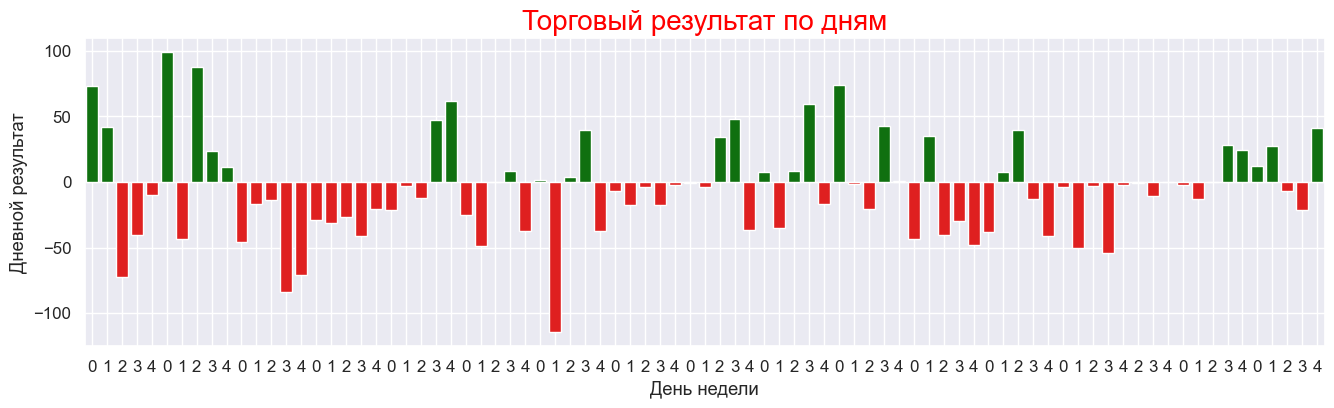

In [22]:
sx = df_date['Open Time'].dt.date
sy = df_date['Daily_Profit']

cols = ['red' if x < 0.0 else 'green' for x in sy]
sns.set(font_scale=1.1)
plt.figure(figsize=(16,4))

sns.barplot(x=sx, y=sy, palette=cols);
x_ticks = df_date['Day_of_Week'].index
x_labels = df_date['Day_of_Week']
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid(True)
plt.xlabel('День недели')
plt.ylabel('Дневной результат')
plt.title('Торговый результат по дням', fontsize=20, color='red');

### По данному графику видно, что убыточных дней у данного трейдера больше прибыльных. Так же можно заметить, что средний прибыльный день больше среднего убыточного.

### Создадим датафрейм с группировкой по дням недели

In [23]:
df_day_of_week = df_date.groupby('Day_of_Week').agg(Profit=('Daily_Profit', 'median'), 
                                                    Orders=('Orders','median'), 
                                                    Profit_Orders=('Profit_Orders','median'), 
                                                    Loss_Orders=('Loss_Orders','median')).reset_index().round(0)
df_day_of_week.head()

,Day_of_Week,Profit,Orders,Profit_Orders,Loss_Orders
0,0,-3.0,18.0,4.0,12.0
1,1,-15.0,32.0,4.0,28.0
2,2,-3.0,18.0,4.0,12.0
3,3,-11.0,24.0,7.0,17.0
4,4,-10.0,21.0,5.0,19.0


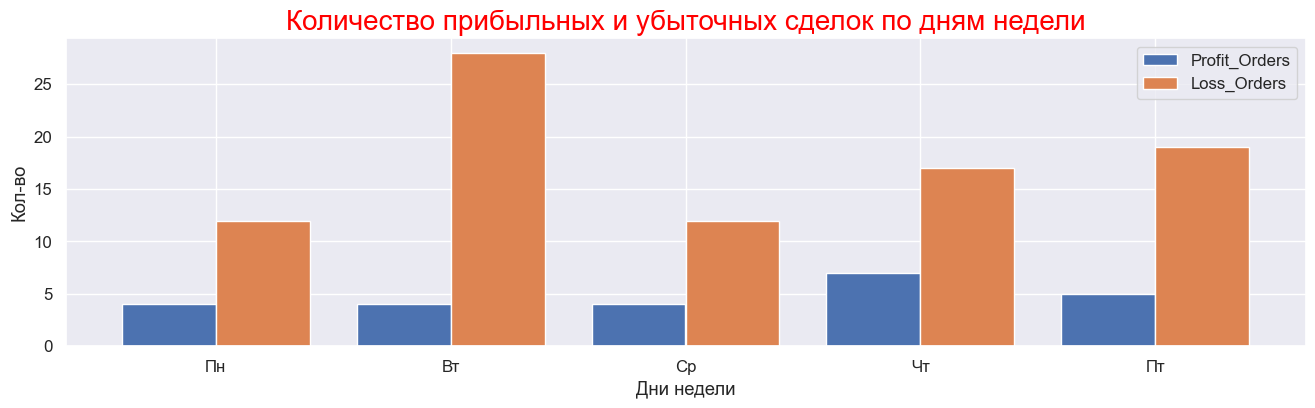

In [24]:
plt.figure(figsize=(16, 4))
n_ticks = np.arange(len(df_day_of_week['Day_of_Week']))

# определяем сдвиг
offset = 0.2
# определяем ширину столбцов
w = 0.4
# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, df_day_of_week['Profit_Orders'], width=w)
plt.bar(n_ticks + offset, df_day_of_week['Loss_Orders'], width=w)

plt.title('Количество прибыльных и убыточных сделок по дням недели', fontsize=20, color='red')
plt.xlabel('Дни недели')
plt.ylabel('Кол-во')
plt.legend(['Profit_Orders', 'Loss_Orders'])
plt.xticks(n_ticks, ['Пн', 'Вт', 'Ср', 'Чт', 'Пт']);

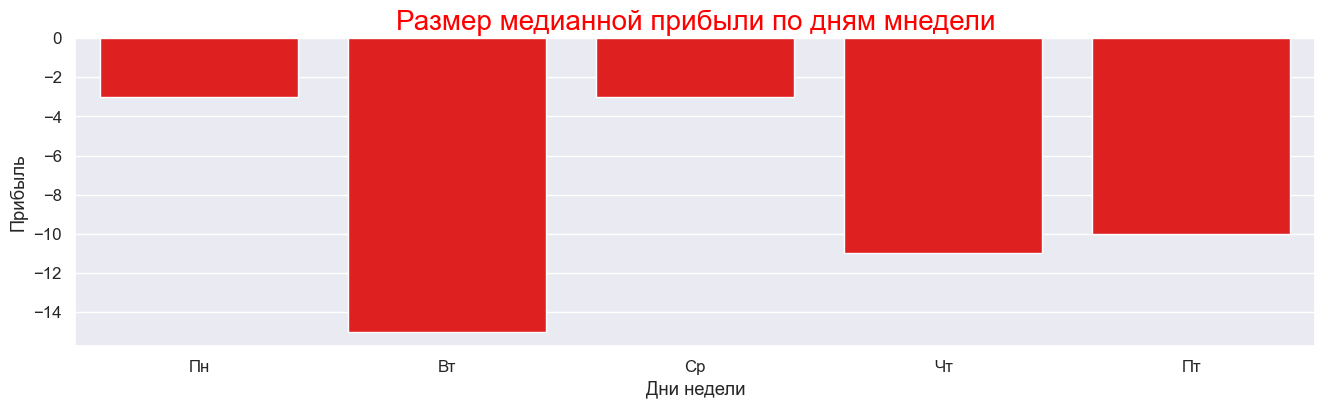

In [25]:
sx = df_day_of_week['Day_of_Week']
sy = df_day_of_week['Profit']
cols = ['red' if x < 0.0 else 'green' for x in sy]

plt.figure(figsize=(16,4))
sns.barplot(x=sx, y=sy, palette=cols);
plt.title('Размер медианной прибыли по дням мнедели', fontsize=20, color='red');
plt.xlabel('Дни недели')
plt.xticks(n_ticks, ['Пн', 'Вт', 'Ср', 'Чт', 'Пт']);
plt.ylabel('Прибыль');

### Торговая активность по дням значительно не отличается. Медианная прибыль каждого дня недели находится в отрицательной зоне, при этом самый убыточный день - вторник.

### Создадим датафрейм с группировкой по часам

In [26]:
df_hour_of_day = df_ord.groupby('Hour').agg(Profit_Total=('Profit', 'sum'), 
                                            Orders=('Profit','count'), 
                                            Pos_Orders=('Profit_Orders','sum'),
                                            Neg_Orders=('Loss_Orders','sum')).reset_index().round(0)
df_hour_of_day.head()

,Hour,Profit_Total,Orders,Pos_Orders,Neg_Orders
0,1,-3.0,1,0,1
1,2,-3.0,1,0,1
2,3,-8.0,2,1,1
3,4,-28.0,64,16,48
4,5,-3.0,64,12,52


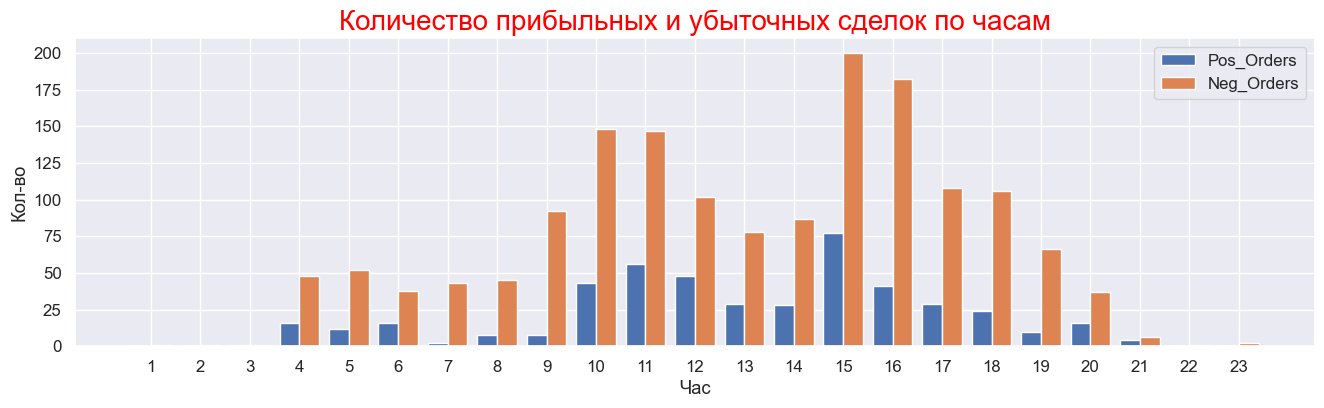

In [27]:
plt.figure(figsize=(16, 4))
n_ticks = np.arange(len(df_hour_of_day['Hour']))

# определяем сдвиг
offset = 0.2
# определяем ширину столбцов
w = 0.4
# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, df_hour_of_day['Pos_Orders'], width=w)
plt.bar(n_ticks + offset, df_hour_of_day['Neg_Orders'], width=w)

plt.title('Количество прибыльных и убыточных сделок по часам', fontsize=20, color='red')
plt.xlabel('Час')
plt.ylabel('Кол-во')
plt.legend(['Pos_Orders', 'Neg_Orders'])
plt.xticks(n_ticks, df_hour_of_day['Hour']);

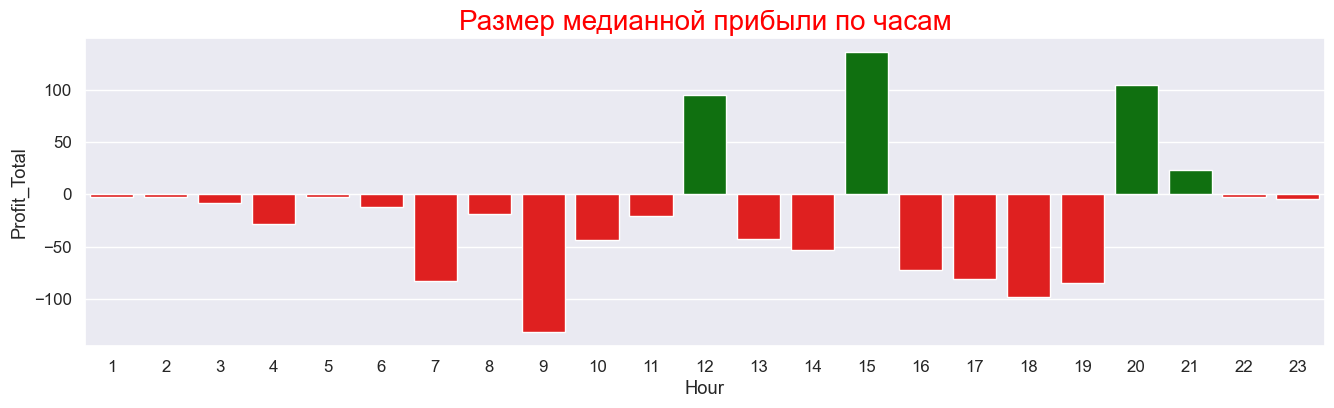

In [28]:
sx = df_hour_of_day['Hour']
sy = df_hour_of_day['Profit_Total']
cols = ['red' if x < 0.0 else 'green' for x in sy]

plt.figure(figsize=(16,4))
sns.barplot(x=sx, y=sy, palette=cols);
plt.title('Размер медианной прибыли по часам', fontsize=20, color='red');

### По данному графику видно, что самый активный торговый период проходит с 10 до 19 часов. Данный период приходится на европейскую и первую половину американской сессии, которые отличаются большей волатильностью. Также в эти часы видно увеличение положительных сделок.

### Рассчитаем количество убыточных и прибыльных серий из торговой истории по дням

In [29]:
change = 0
arr_neg_series = []
arr_pos_series = []

series = df_date['Daily_Profit']
flag = True if series[0] > 0 else False
pos_series = 0 if not flag else 1
neg_series = 0 if flag else 1
sum_series = series[0]
count = series.count()

for i in range(1, count):
    if(series[i-1] > 0 and series[i] < 0):
        change+=1
        flag = False
        neg_series = 0
        arr_pos_series.append((pos_series, sum_series))
        sum_series = 0
    if(series[i-1] < 0 and series[i] > 0):
        change+=1
        flag = True
        pos_series=0
        arr_neg_series.append((neg_series, sum_series))
        sum_series = 0
    if flag == False:
        neg_series+=1
        sum_series+=series[i]
    else:
        pos_series+=1
        sum_series+=series[i]

if flag:
    arr_pos_series.append((pos_series, sum_series))
else:
    arr_neg_series.append((neg_series, sum_series))


In [30]:
profit_day_mean = df_date[df_date['Daily_Profit'] > 0]['Daily_Profit'].mean()
loss_day_mean = df_date[df_date['Daily_Profit'] < 0]['Daily_Profit'].mean()

profit_day_list = list((x[0] for x in arr_pos_series))
loss_day_list = list((x[0] for x in arr_neg_series))

round(profit_day_mean,2), round(loss_day_mean, 2), np.median(profit_day_list), np.median(loss_day_list)

(33.06, -26.95, 2.0, 2.0)

### Из расчетов видно, что средняя прибыль за день больше среднего убытка.

### Создаем датафрейм с группировкой по количеству открытых сделок в день.

In [31]:
df_ord_group = df_date.groupby('Orders').agg(Daily_Profit=('Daily_Profit','median'), 
                                             Loss_Orders=('Loss_Orders','median')).reset_index()

df_ord_group['Profit_Orders'] = df_ord_group['Orders'] - df_ord_group['Loss_Orders']

df_ord_group.describe()

,Orders,Daily_Profit,Loss_Orders,Profit_Orders
count,45.000000,45.000000,45.000000,45.000000
mean,28.533333,-8.140556,22.500000,6.033333
std,19.318620,36.604268,16.247377,5.112818
min,1.000000,-114.420000,0.500000,0.000000
25%,13.000000,-24.015000,10.000000,2.000000
50%,25.000000,-5.215000,20.000000,5.000000
75%,41.000000,7.570000,34.000000,9.000000
max,66.000000,87.380000,60.000000,22.000000


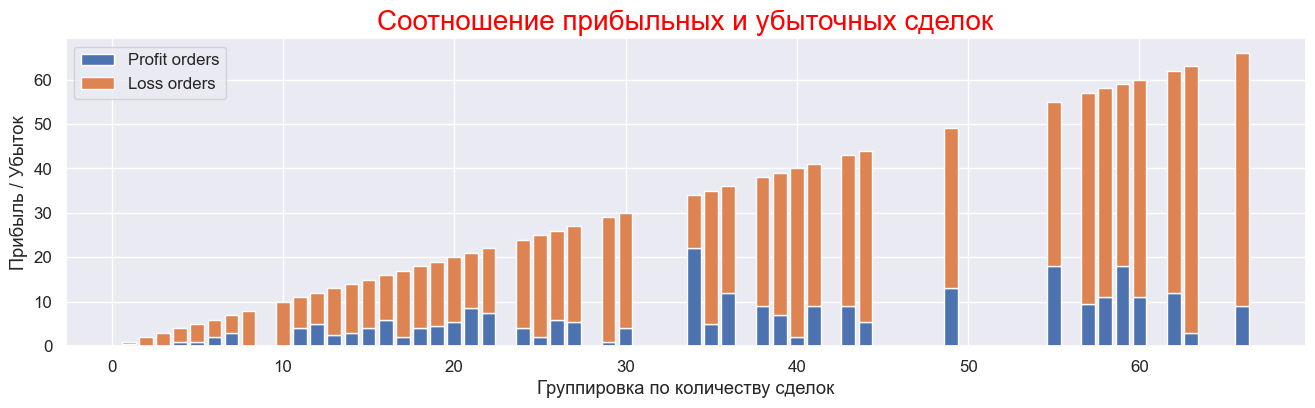

In [32]:
# Строим столбчатую многорядную сложенную диаграмму
plt.figure(figsize=(16, 4))

plt.bar(df_ord_group['Orders'], df_ord_group['Profit_Orders'])
plt.bar(df_ord_group['Orders'], df_ord_group['Loss_Orders'], bottom=df_ord_group['Profit_Orders'])

plt.title('Соотношение прибыльных и убыточных сделок', fontsize=20, color='red')
plt.xlabel('Группировка по количеству сделок')
plt.ylabel('Прибыль / Убыток')
plt.legend(['Profit orders', 'Loss orders']);

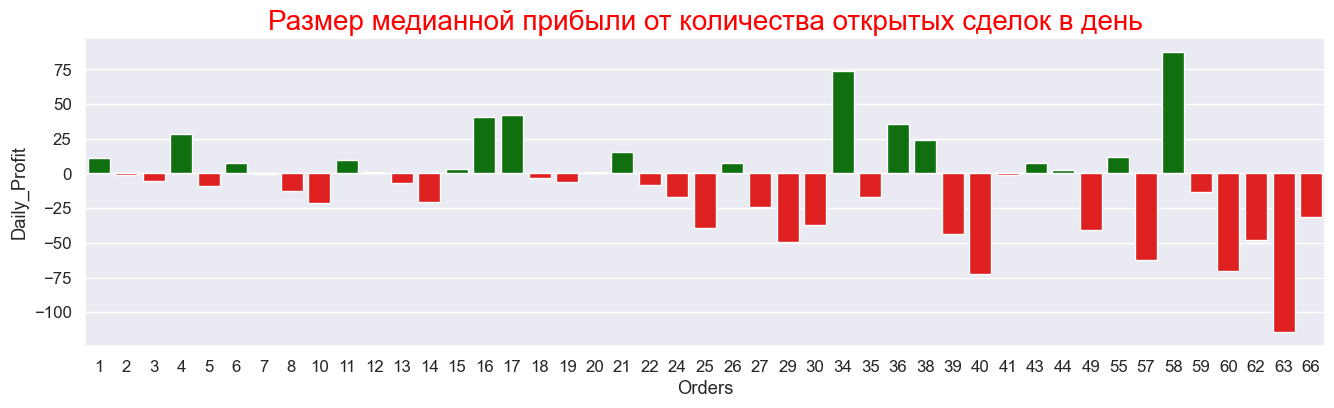

In [33]:
sx = df_ord_group['Orders']
sy = df_ord_group['Daily_Profit']
cols = ['red' if x < 0.0 else 'green' for x in sy]

# sns.set(font_scale=1.1)
plt.figure(figsize=(16,4))
sns.barplot(x=sx, y=sy, palette=cols);
plt.title('Размер медианной прибыли от количества открытых сделок в день', fontsize=20, color='red');

In [34]:
corr_matrix = df_ord_group.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
# corr_matrix

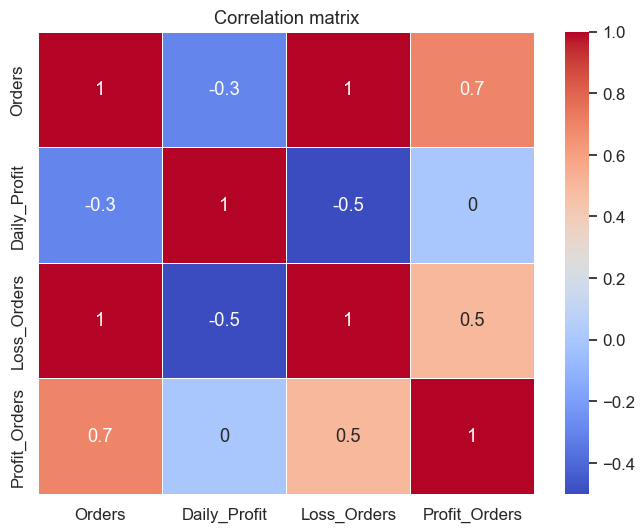

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

### Прибыльные ордера в среднем не превышают определенный диапазон, в то время как убыточные показывают рост с общим числом открытых сделок в день. Также видим, что большое количество открытых сделок в день негативно влияет на торговый результат. Чем больше торговых операций, тем больше убытков.

### Создаем датафрейм с группировкой по инструментам

In [36]:
df_sym_group = df_ord.groupby('Symbol').agg(Profit=('Profit', 'sum'),
                                            Pos_Orders=('Profit_Orders', 'sum'), 
                                            Neg_Orders=('Loss_Orders','sum'), 
                                            Interval=('Interval','mean')).round(2).reset_index()

df_sym_group.loc[(df_sym_group.Pos_Orders == 0), 'Pos_Orders'] = 1

# df_sym_group[df_sym_group['Pos_Orders'] == 0]['Pos_Orders'] = 1
df_sym_group.insert(loc = 4, column = 'N/P', value = (df_sym_group['Neg_Orders']/df_sym_group['Pos_Orders']).round(2))

df_sym_group

,Symbol,Profit,Pos_Orders,Neg_Orders,N/P,Interval
0,audjpy,-4.26,1,3,3.00,1.25
1,audusd,-111.61,13,79,6.08,94.11
2,brn,12.20,22,106,4.82,194.34
3,btcusd,22.15,1,1,1.00,234.00
4,eurjpy,-17.46,23,64,2.78,53.59
5,eurusd,23.46,108,242,2.24,73.67
6,gbpjpy,-38.05,19,74,3.89,62.51
7,gbpusd,-45.54,49,144,2.94,54.07
8,nq100_m,-1.07,27,138,5.11,46.44
9,nzdjpy,-14.09,1,5,5.00,80.00


In [37]:
df_sym_group['N/P'].describe()

count    20.000000
mean      4.059000
std       1.986679
min       1.000000
25%       2.680000
50%       3.920000
75%       5.027500
max       9.000000
Name: N/P, dtype: float64

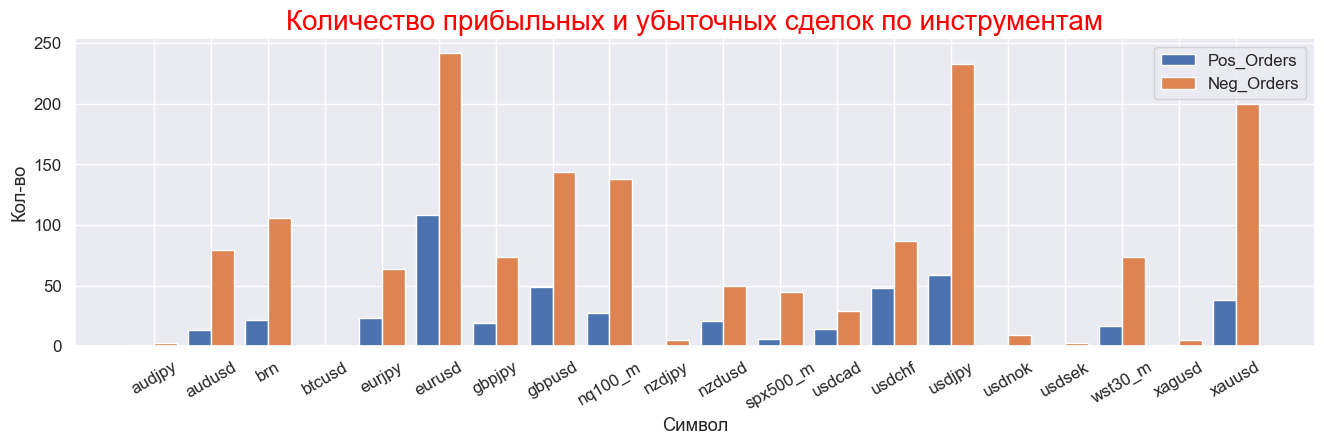

In [38]:
plt.figure(figsize=(16, 4))
n_ticks = np.arange(len(df_sym_group['Symbol']))

# определяем сдвиг
offset = 0.2
# определяем ширину столбцов
w = 0.4
# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, df_sym_group['Pos_Orders'], width=w)
plt.bar(n_ticks + offset, df_sym_group['Neg_Orders'], width=w)

plt.title('Количество прибыльных и убыточных сделок по инструментам', fontsize=20, color='red')
plt.xlabel('Символ')
plt.ylabel('Кол-во')
plt.legend(['Pos_Orders', 'Neg_Orders'])
plt.xticks(n_ticks, df_sym_group['Symbol'], rotation=30);

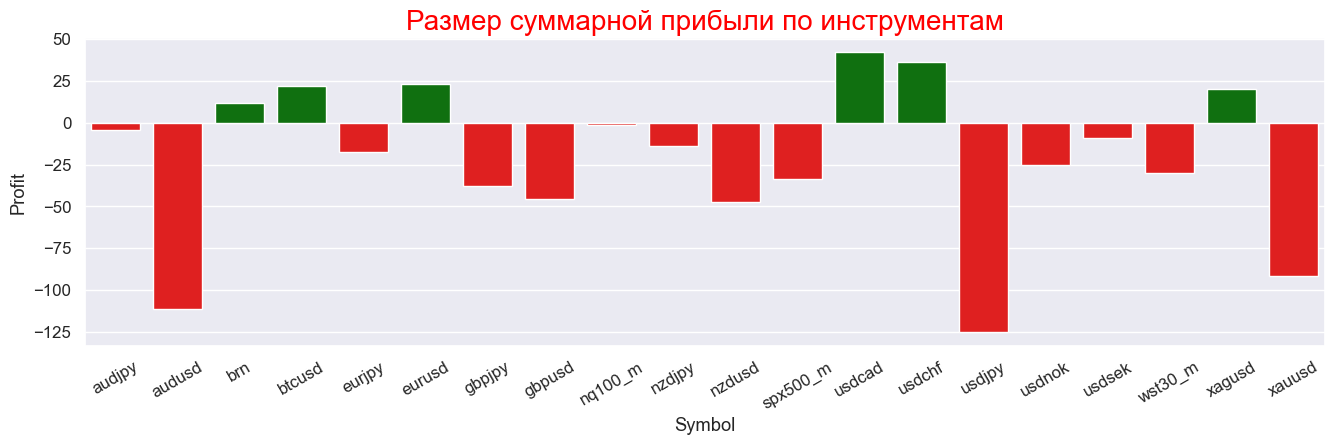

In [39]:
sx = df_sym_group['Symbol']
sy = df_sym_group['Profit']
cols = ['red' if x < 0.0 else 'green' for x in sy]

plt.figure(figsize=(16,4))
sns.barplot(x=sx, y=sy, palette=cols);
plt.title('Размер суммарной прибыли по инструментам', fontsize = 20, color='red');
plt.xticks(rotation=30);

### Анализ по символам показывает, что торговля по символам AUDUSD, USDJPY, XAUUSD приносит больше всего убытков. По EURUSD при положительном общем результате самое большое количество убыточных сделок. </br>Необходимо исключить их из торговли или изменить стратегию торговли по данным инструментам.

# Применим сделанные выводы

### Отфильтруем все сделки, совершенные в азиатскую сессию и в конце американской сессии.

In [40]:
df_modified = df_period_pos[(df_period_pos['Open Time'].dt.hour > 9) & (df_period_pos['Open Time'].dt.hour < 19)].reset_index(drop=True)
df_modified['Total_Profit'] = df_modified.agg({'Profit': 'cumsum'})
df_modified.tail()

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit,Total_Profit,Interval
1528,1528671766,2023-07-28 12:41:48,buy,0.01,nq100_m,2023-07-28 19:00:38,19.36,-215.67,10
1529,1528678959,2023-07-28 14:52:49,buy,0.02,usdjpy,2023-07-28 17:01:54,15.65,-200.02,131
1530,1528678919,2023-07-28 14:52:49,buy,0.01,usdjpy,2023-07-28 14:53:46,-0.14,-200.16,0
1531,1528679994,2023-07-28 15:15:09,buy,0.03,usdjpy,2023-07-28 17:01:36,20.24,-179.92,22
1532,1528692824,2023-07-28 17:36:48,buy,0.02,usdjpy,2023-07-28 17:40:01,-1.67,-181.59,141


In [41]:
def get_result(df_mod, df_add):
    result = pd.concat([df_mod, df_add], ignore_index=True)
    result.sort_values('Open Time', inplace=True)
    result['Total_Profit'] = result.agg({'Profit': 'cumsum'})
    result.reset_index(inplace=True, drop=True)
    return result

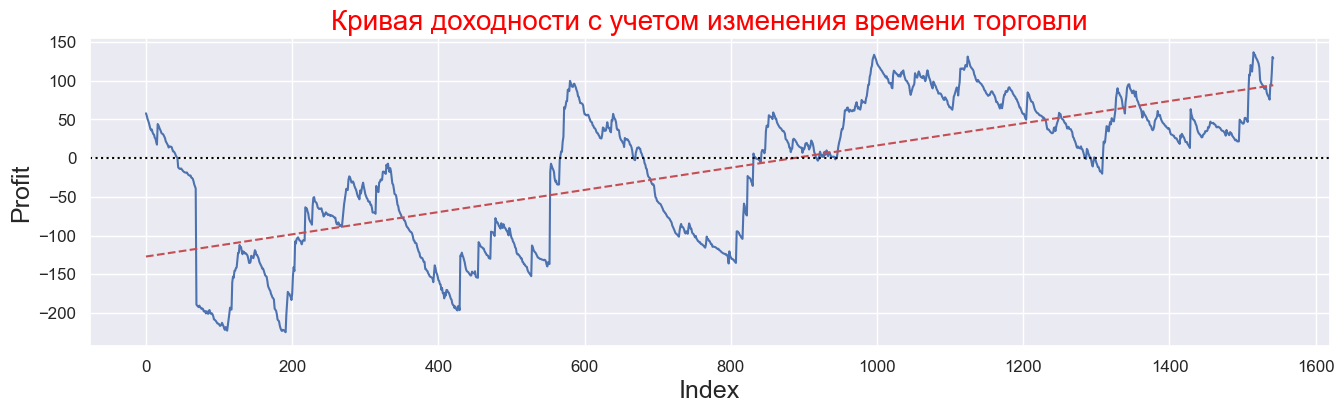

In [42]:
df_result = get_result(df_modified, df_period_op)

x = df_result['Total_Profit'].index
y = df_result['Total_Profit']
DrawChart(x, y, 'Кривая доходности c учетом изменения времени торговли', 'Index', 'Profit')

In [43]:
df_result.tail(1)

,Ticket,Open Time,Type,Size,Symbol,Close Time,Profit,Total_Profit,Interval
1542,1528692824,2023-07-28 17:36:48,buy,0.02,usdjpy,2023-07-28 17:40:01,-1.67,129.03,141.0


### Как мы видим, если исключить торговую активность в период слабой волатильности, когда европейская и американская биржи еще закрыты, торгового счет трейдера с учетом снятий и пополнений будет в положительной зоне.

### Величина Z = (A * (C — 0.5) — B)/   ((B*(B — C))/(C -1))^(1/2)</br>где:
* ### A = количество анализируемых сделок;
* ### B = 2*количество прибыльных сделок * количество убыточных сделок;
* ### C = количество чередований в выборке (чередованием считается каждая пара сделок, когда прибыльная сделка сменяет убыточную либо наоборот).

In [44]:
A = df_period_pos['Profit'].count()
count_pos = df_period_pos['Profit'].gt(0).sum()
count_neg = df_period_pos['Profit'].lt(0).sum()
B = 2 * count_neg * count_pos

change = 0
arr_neg_series=[]
arr_pos_series = []
series = df_period_pos['Profit']

flag = True if series[0]>0 else False
pos_series = 0 if not flag else 1
neg_series = 0 if flag else 1
sum_series = series[0]
count = series.count()

for i in range(1, count):
    if(series[i-1] > 0 and series[i] < 0):
        change+=1
        flag = False
        neg_series = 0
        arr_pos_series.append((pos_series, sum_series))
        sum_series = 0
    if(series[i-1] < 0 and series[i] > 0):
        change+=1
        flag = True
        pos_series=0
        arr_neg_series.append((neg_series, sum_series))
        sum_series = 0
    if flag == False:
        neg_series+=1
        sum_series+=series[i]
    else:
        pos_series+=1
        sum_series+=series[i]

if flag:
    arr_pos_series.append((pos_series, sum_series))
else:
    arr_neg_series.append((neg_series, sum_series))

C = change

In [45]:
count_neg, count_pos, A, C

(1591, 468, 2059, 516)

In [46]:
sn = sum(x[0] for x in arr_neg_series)
sp = sum(x[0] for x in arr_pos_series)
sn, sp, sn+sp, len(arr_neg_series)+len(arr_pos_series)

(1591, 468, 2059, 517)

In [47]:
Z = (A * (C - 0.5) - B) / ((B * (B - C)) / (C - 1))**(1/2)
round(Z,2)

-6.52

### Отрицательный Z-счет обозначает меньше чередований в эталонных сделках, чем ожидалось статистически. То есть прибыльные сделки имеют тенденцию следовать за прибыльными, а убыточные за убыточными.

In [48]:
neg_series_list = list(x[0] for x in arr_neg_series)
neg_profit_series_list = list(x[1] for x in arr_neg_series)
np.mean(neg_series_list).round(), max(neg_series_list), np.mean(neg_profit_series_list).round(2)

(6.0, 43, -12.96)

### Среднее количество сделок в убыточной серии составляет 6, максимальное 43.

In [49]:
pos_series_list = list(x[0] for x in arr_pos_series)
pos_profit_series_list = list(x[1] for x in arr_pos_series)
np.mean(pos_series_list).round(), max(pos_series_list), np.mean(pos_profit_series_list).round(2)

(2.0, 12, 11.32)

### Среднее количество сделок в прибыльной серии составляет 2, максимальное 12.

### Напишем функцию для применения выводов, полученных из расчета величины Z-счета. После закрытия сделки с прибылью увеличиваем объем следующего в списке ордера вдвое, а при получении убытка увеличение для следующего ордера не применяем.

In [50]:
def get_multy_lot_after_profit(df_analysis, max_count_profit):
    arr_result = []
    profit_cum = 0
    count = 0
    
    for i, row in df_analysis.iterrows():
        time = row[1]
        profit = row[6]

        if count > 0 and count < max_count_profit:
            profit *= 2
        if profit > 0:
            count += 1
        else:
            count = 0
        profit_cum += profit
        
        arr_result.append([time, profit])
    print(max_count_profit, round(profit_cum,2), len(arr_result))
    return [max_count_profit, profit_cum, arr_result]

In [51]:
lst = np.arange(0, 10, 1)
for x in lst:
    get_multy_lot_after_profit(df_modified, x)

0 -181.59 1533
1 -181.59 1533
2 69.56 1533
3 241.0 1533
4 263.1 1533
5 296.71 1533
6 336.33 1533
7 336.02 1533
8 348.75 1533
9 354.2 1533


### Использование данного приема значительно улучшает торговый результат.

5 296.71 1533


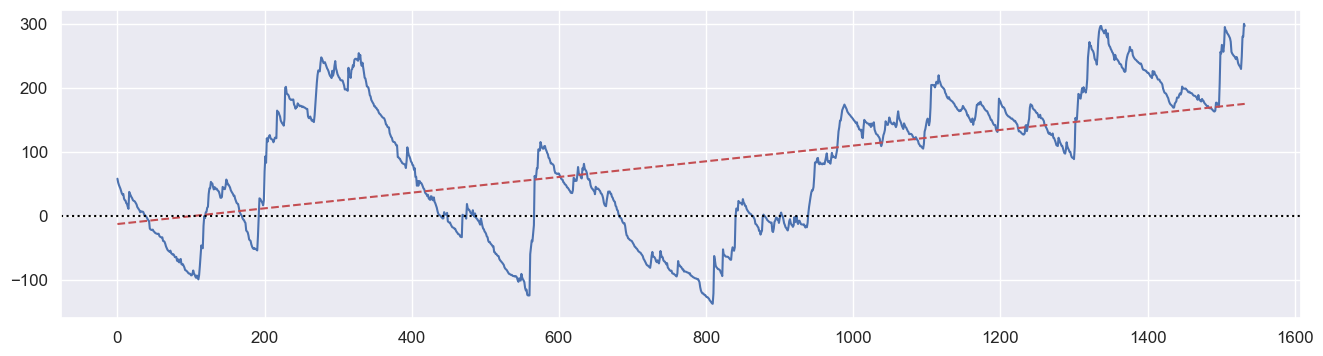

In [52]:
lst = get_multy_lot_after_profit(df_modified, 5)

lst2 = list(x[1] for x in lst[2])
arr = [sum(lst2[:i+1]) for i in range(len(lst2))]
x = range(0,len(arr))
y = arr
DrawChart(x,y)

In [53]:
df_modified_multy_lot = pd.DataFrame(lst[2], columns=['Open Time', 'Profit'])
df_modified_multy_lot.head()

,Open Time,Profit
0,2023-04-03 10:41:47,57.94
1,2023-04-03 11:36:42,-5.96
2,2023-04-03 11:38:10,-3.80
3,2023-04-03 15:13:22,-2.85
4,2023-04-03 15:38:55,-2.87


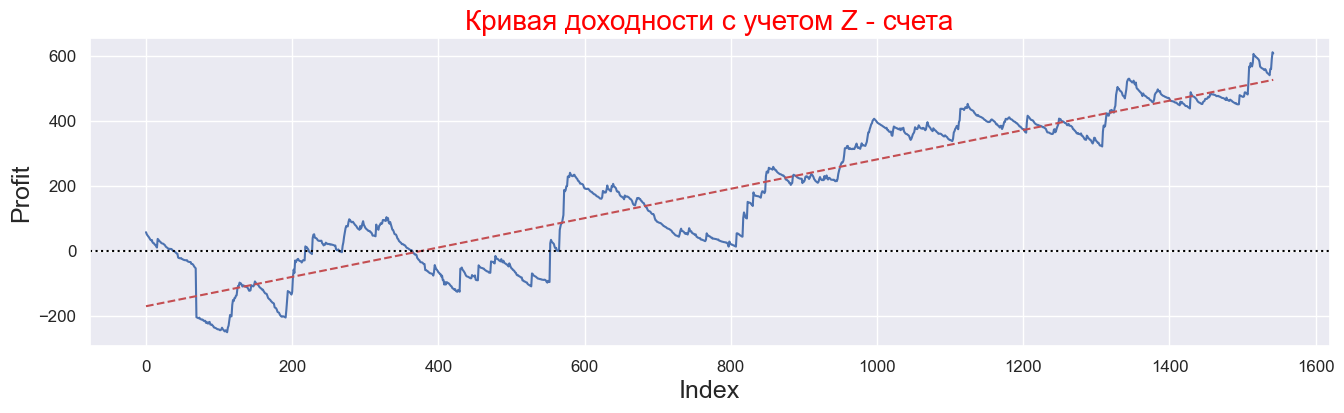

In [54]:
df_result = get_result(df_modified_multy_lot, df_period_op)

x = df_result['Total_Profit'].index
y = df_result['Total_Profit']
DrawChart(x, y, 'Кривая доходности c учетом Z - счета', 'Index', 'Profit')

In [55]:
df_result.tail(1)

,Open Time,Profit,Ticket,Type,Size,Symbol,Close Time,Total_Profit
1542,2023-07-28 17:36:48,-3.34,NaN,NaN,NaN,NaN,NaT,607.33


### Применение статистического значения Z - счета значительно улучшает торговаый результат.

In [56]:
set_sym = set(df_modified['Symbol'].tolist())
len(set_sym)

20

### Напишем функцию для проведение анализа торгового результата при ограничении количества убыточных ордеров в день и установке перерыва после получения убытка в сдлелке. Так же с разделенияем по символам.

In [57]:
def get_profit_delay(max_loss_day, min_interval):
    arr_result = []
    profit_sum = 0
    for sym in set_sym:
        arr_series = []
        count = 0
        change = -1
        last_type = ''
        last_loss_time = pd.Timestamp(2020, 1, 5, 12)
        last_date = df_modified.iloc[0][1].date()

        for i, row in df_modified.iterrows():
            if not row[4] == sym:
                continue
                
            pos_type = row[2]
            profit = row[6]
            time_open = row[1]
            time_close = row[5]
            date = time_open.date()

            if not last_type == pos_type:
                change += 1
                last_type = pos_type
            
            if not last_date == date:
                arr_result += arr_series
                arr_series.clear()
                count = 0
                last_loss_time = pd.Timestamp(2020, 1, 5, 12)
                last_date = date

            if count > 0:
                if min_interval > 0:
                    if last_loss_time + pd.Timedelta(minutes=min_interval) > time_open:
                        continue
                if max_loss_day > 0 and count >= max_loss_day:
                    continue

            if last_date == date:
                profit_sum += profit
                arr_series.append(profit)
                if profit < 0:
                    count += 1
                    last_loss_time = time_close
        arr_result += arr_series
#         print(sym, change)
#     print(max_loss_day, min_interval, round(profit_sum, 2), len(arr_result))#, round(sum(arr_result),2)
    return [max_loss_day, min_interval, round(sum(arr_result),2)]

In [58]:
t = 0
arr_profit = []
for i in range(21):
    for j in range(11):
        arr_profit.append(get_profit_delay(j, t))
    t += 30

In [59]:
df_modified_max_loss_delay = pd.DataFrame(arr_profit, columns=['max_ord_day', 'min_interval', 'Profit'])
df_modified_max_loss_delay

,max_ord_day,min_interval,Profit
0,0,0,-181.59
1,1,0,50.96
2,2,0,-55.43
3,3,0,-122.85
4,4,0,-166.82
...,...,...,...
226,6,600,50.96
227,7,600,50.96
228,8,600,50.96
229,9,600,50.96


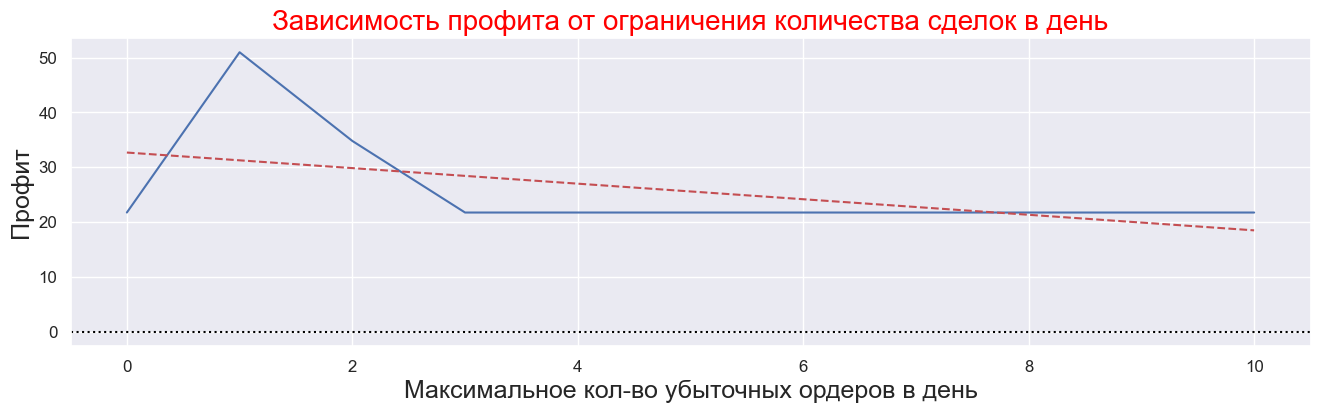

In [60]:
df_modified_max_loss_delay_1  = df_modified_max_loss_delay\
                                .groupby('max_ord_day')\
                                .agg(Profit=('Profit', 'median'))\
                                .round(2).reset_index()
x = df_modified_max_loss_delay_1['max_ord_day']
y = df_modified_max_loss_delay_1['Profit']
DrawChart(x, y, 'Зависимость профита от ограничения количества сделок в день', 
          'Максимальное кол-во убыточных ордеров в день', 'Профит')

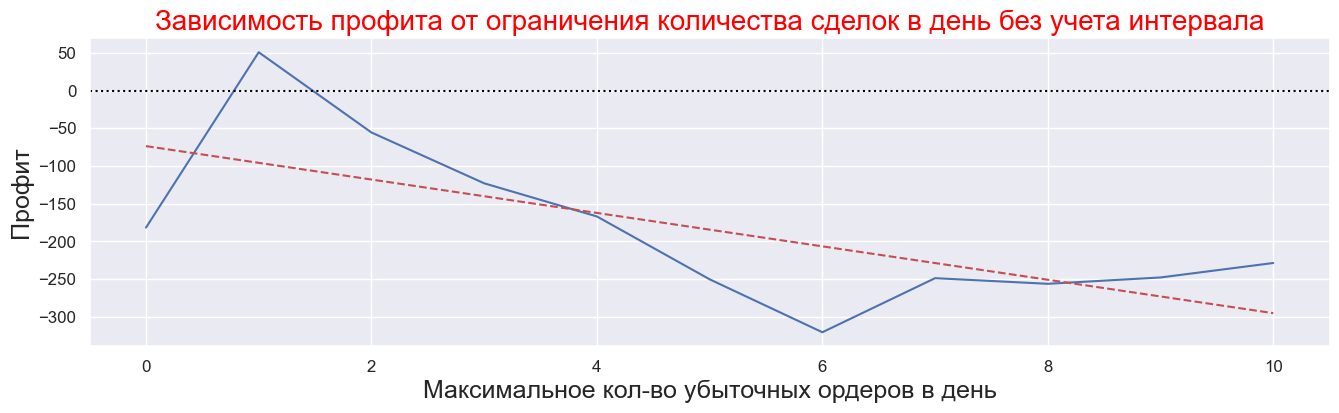

In [61]:
df_modified_max_loss_delay_11 = df_modified_max_loss_delay[df_modified_max_loss_delay['min_interval']==0]\
                                .groupby('max_ord_day')\
                                .agg(Profit=('Profit', 'median'))\
                                .round(2).reset_index()
x = df_modified_max_loss_delay_11['max_ord_day']
y = df_modified_max_loss_delay_11['Profit']
DrawChart(x, y, 'Зависимость профита от ограничения количества сделок в день без учета интервала', 
          'Максимальное кол-во убыточных ордеров в день', 'Профит')

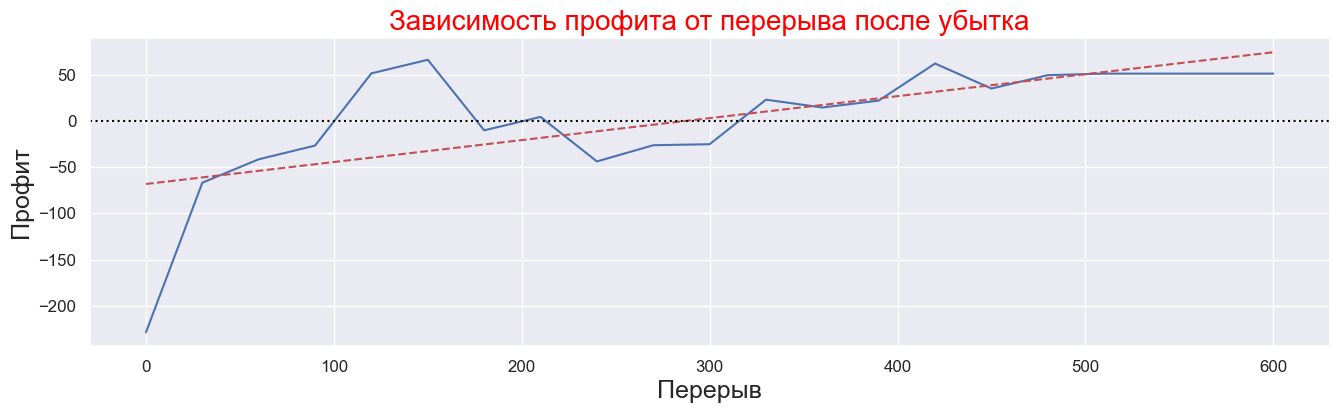

In [62]:
df_modified_max_loss_delay_2  = df_modified_max_loss_delay\
                                .groupby('min_interval')\
                                .agg(Profit=('Profit', 'median'))\
                                .round(2).reset_index()
x = df_modified_max_loss_delay_2['min_interval']
y = df_modified_max_loss_delay_2['Profit']
DrawChart(x, y, 'Зависимость профита от перерыва после убытка', 'Перерыв', 'Профит')

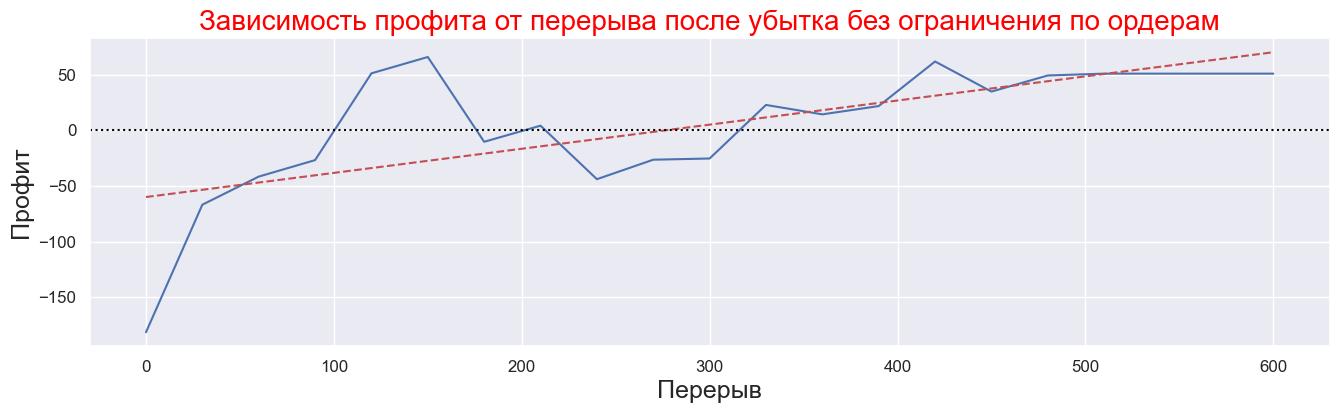

In [77]:
df_modified_max_loss_delay_21 = df_modified_max_loss_delay[df_modified_max_loss_delay['max_ord_day']==0]\
                                .groupby('min_interval')\
                                .agg(Profit=('Profit', 'median'))\
                                .round(2).reset_index()
x = df_modified_max_loss_delay_21['min_interval']
y = df_modified_max_loss_delay_21['Profit']
DrawChart(x, y, 'Зависимость профита от перерыва после убытка без ограничения по ордерам', 'Перерыв', 'Профит')

### Как видим ограничение количества ордеров не приносит нужного положительного эффекта. Установление паузы после убыточного ордера напротив приводит к улучшению результатов.

### Напишем функцию, осуществляющую эмитацию паузы после убыточного ордера, без разделения по символам.

In [64]:
# перерыв после убытка

def get_profit_delay_loss(min_interval):
    arr_result = []
    last_loss_time = pd.Timestamp(2020, 1, 5, 12)
    profit_cum = 0
    
    for i, row in df_modified.iterrows():
        time_open = row[1]
        time_close = row[5]
        profit = row[6]

        if min_interval > 0 and last_loss_time + pd.Timedelta(minutes=min_interval) > time_open:
            continue
        if profit < 0:
            last_loss_time = time_close
            
        profit_cum += profit
        
        arr_result.append([time_open, profit])
#     print(min_interval, round(profit_cum,2), len(arr_result))
    return [min_interval, profit_cum, arr_result]

In [65]:
lst = np.arange(0, 250, 10)
arr_total_profit = []
for x in lst:
    arr_total_profit.append(get_profit_delay_loss(x))

In [66]:
np.median(list(arr_total_profit[i][1] for i in range(0, len(arr_total_profit)))).round(2)

16.41

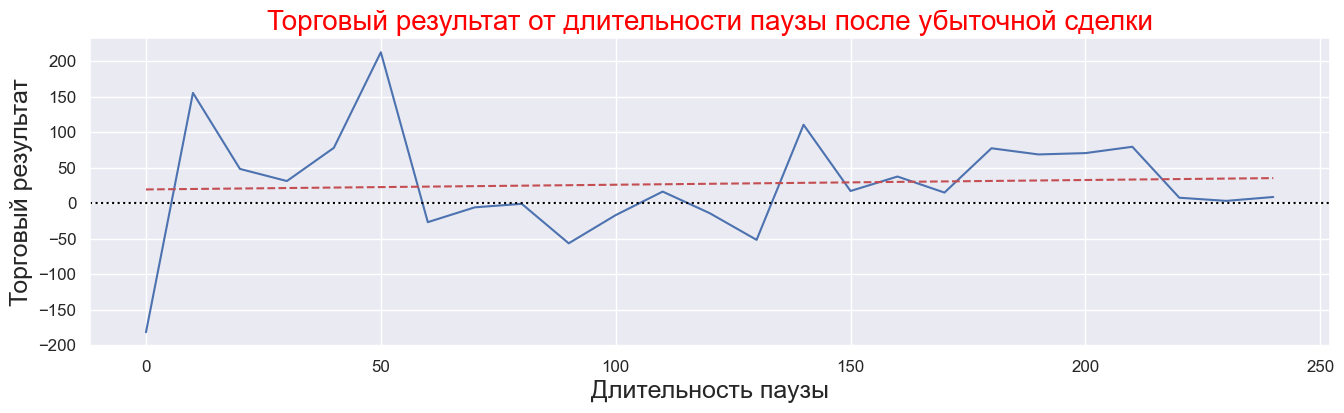

In [67]:
sx = list(x[0] for x in arr_total_profit)
sy = list(x[1] for x in arr_total_profit)
DrawChart(sx,sy, 'Торговый результат от длительности паузы после убыточной сделки', 'Длительность паузы', 'Торговый результат')

### Напишем функцию, осуществляющую эмитацию паузы после убыточного ордера, с разделением по символам.

In [68]:
def get_profit_delay_loss_sym(min_interval):
    arr_result = []
    profit_cum = 0
    for sym in set_sym:
        last_loss_time = pd.Timestamp(2020, 1, 5, 12)
        
        for i, row in df_modified.iterrows():
            if not row[4] == sym:
                continue
            
            time_open = row[1]
            time_close = row[5]
            profit = row[6]

            if min_interval > 0 and last_loss_time + pd.Timedelta(minutes=min_interval) > time_open:
                continue
            if profit < 0:
                last_loss_time = time_close

            profit_cum += profit

            arr_result.append([time_open, profit])
#     print(min_interval, round(profit_cum,2), len(arr_result))
    return [min_interval, profit_cum, arr_result]

In [69]:
lst = np.arange(0, 250, 10)
arr_total_profit_sym = []
for x in lst:
    arr_total_profit_sym.append(get_profit_delay_loss_sym(x))

In [70]:
np.median(list(arr_total_profit_sym[i][1] for i in range(0, len(arr_total_profit_sym)))).round(2)

18.07

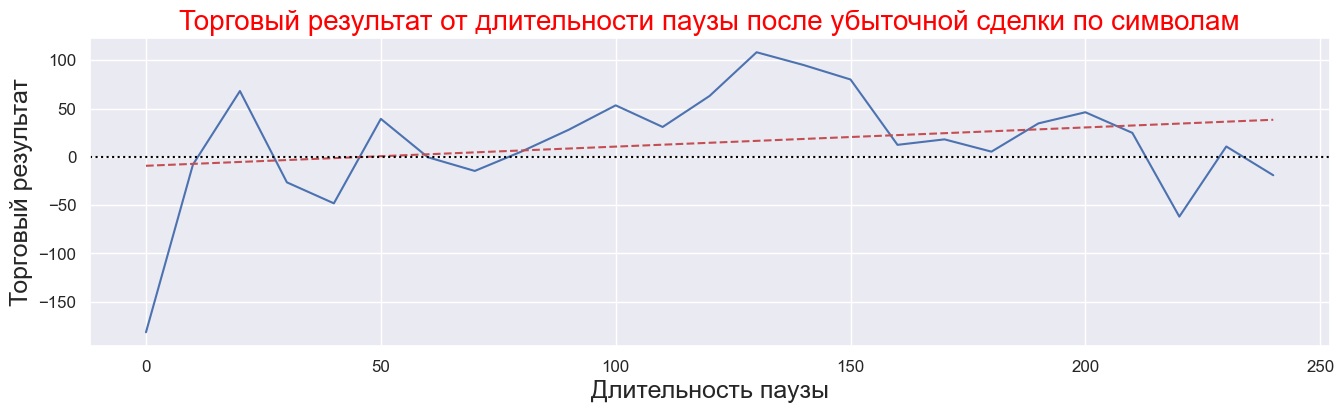

In [71]:
sx = list(x[0] for x in arr_total_profit_sym)
sy = list(x[1] for x in arr_total_profit_sym)
DrawChart(sx,sy, 'Торговый результат от длительности паузы после убыточной сделки по символам', 
          'Длительность паузы', 'Торговый результат')

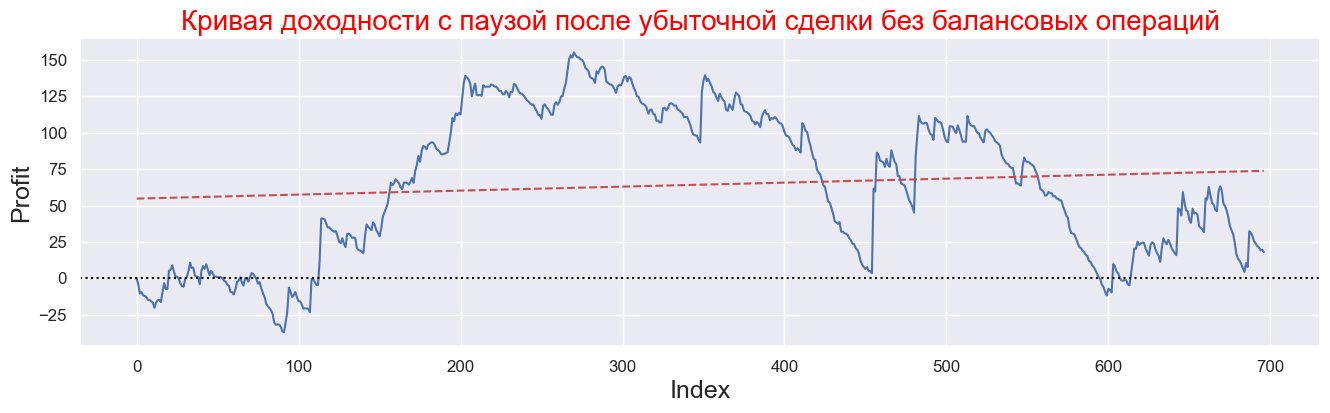

In [72]:
lst = get_profit_delay_loss_sym(170)

lst2 = list(x[1] for x in lst[2])
arr = [sum(lst2[:i+1]) for i in range(len(lst2))]
x = range(0,len(arr))
y = arr
DrawChart(x,y, 'Кривая доходности с паузой после убыточной сделки без балансовых операций', 'Index', 'Profit')

In [73]:
df_modified_sym_loss = pd.DataFrame(lst[2], columns=['Open Time', 'Profit'])
df_modified_sym_loss.head()

,Open Time,Profit
0,2023-04-14 10:48:36,-0.10
1,2023-04-03 16:39:18,-3.90
2,2023-04-19 14:05:51,-6.40
3,2023-04-03 17:45:33,1.00
4,2023-04-04 11:25:56,-2.22


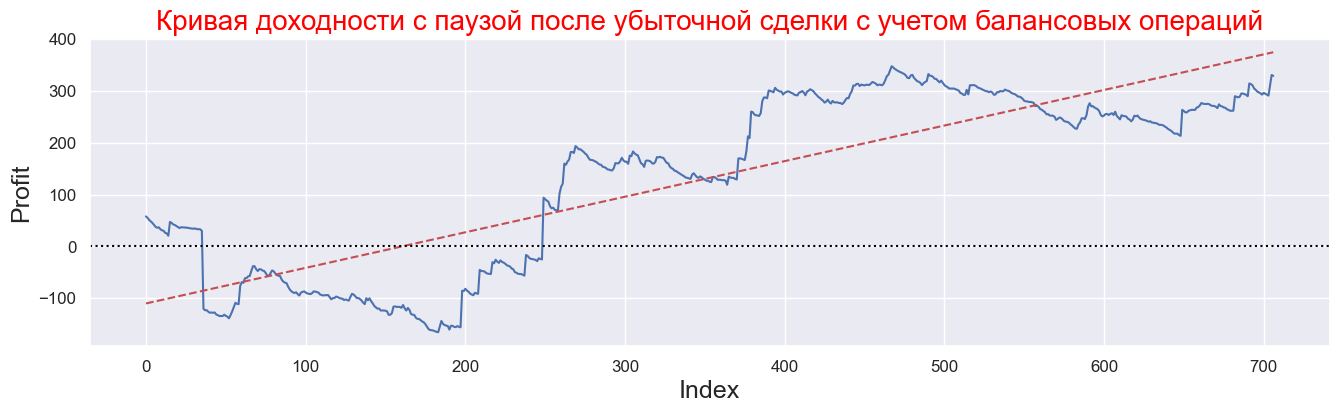

In [74]:
df_result = get_result(df_modified_sym_loss, df_period_op)

x = df_result['Total_Profit'].index
y = df_result['Total_Profit']
DrawChart(x, y, 'Кривая доходности с паузой после убыточной сделки с учетом балансовых операций', 'Index', 'Profit')

In [75]:
df_result.tail(1)

,Open Time,Profit,Ticket,Type,Size,Symbol,Close Time,Total_Profit
706,2023-07-28 17:36:48,-1.67,NaN,NaN,NaN,NaN,NaT,328.69


### Из сделанного выше анализа можно сделать вывод, что трейдер совершает много торговых операция, при этом убыточная серия сделок превышает прибыльную в 3 раза. Данная ситуация описывается самой рспространенной психологической ошибкой в трейдинге, это тильт. 
### Тильт - случайное хаотичное совершение сделок, когда трейдер теряет «чувство реальности» и начинает заключать абсолютно незапланированные сделки, с большой частотой находясь в стрессовом состоянии. Тильт обычно возникает после убыточной сделки (или их череды), причем в тильте трейдер часто теряет чувство самоконтроля.

### Проведем анализ торгового объема

In [76]:
df_period_pos['Size'].describe()

count    2059.000000
mean        0.022948
std         0.018888
min         0.010000
25%         0.010000
50%         0.020000
75%         0.030000
max         0.150000
Name: Size, dtype: float64

### Завывшенного объема не наблюдается. 